# Prosper Loan Data

## by Junwon Seo

In [158]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [159]:
df_og = pd.read_csv('prosperLoanData.csv')

In [160]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Preliminary Wrangling

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [161]:
df_og.shape

(113937, 81)

In [162]:
df_og.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [163]:
df_og.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [164]:
# These are the columns I wish to work with
df = df_og[['ListingKey',
'ListingNumber',
'ListingCreationDate',
'Term',
'LoanStatus',
'BorrowerRate',
'EmploymentStatus',
'IsBorrowerHomeowner',
'CreditScoreRangeUpper',
'DelinquenciesLast7Years',
'RevolvingCreditBalance',
'StatedMonthlyIncome',
'LoanOriginalAmount',
'MonthlyLoanPayment']]

In [165]:
df.drop_duplicates(inplace = True)

A:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [166]:
df.dropna(inplace = True)

A:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105442 entries, 0 to 113936
Data columns (total 14 columns):
ListingKey                 105442 non-null object
ListingNumber              105442 non-null int64
ListingCreationDate        105442 non-null object
Term                       105442 non-null int64
LoanStatus                 105442 non-null object
BorrowerRate               105442 non-null float64
EmploymentStatus           105442 non-null object
IsBorrowerHomeowner        105442 non-null bool
CreditScoreRangeUpper      105442 non-null float64
DelinquenciesLast7Years    105442 non-null float64
RevolvingCreditBalance     105442 non-null float64
StatedMonthlyIncome        105442 non-null float64
LoanOriginalAmount         105442 non-null int64
MonthlyLoanPayment         105442 non-null float64
dtypes: bool(1), float64(6), int64(3), object(4)
memory usage: 11.4+ MB


In [168]:
df.shape

(105442, 14)

In [169]:
df.Term.value_counts()

36    79600
60    24228
12     1614
Name: Term, dtype: int64

There are only 3 terms, these are categorical values, and hence should be converted to string objects

In [170]:
df.Term = df.Term.astype('str')

A:\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


### What is the structure of your dataset?

> This dataset has 105,442 rows and 16 columns

### What is/are the main feature(s) of interest in your dataset? What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Basic individual loan information such as amount, interest, term, monthly payment, as well as borrower's individual information such as past delinquencies, whether they own a home, have a job, and their credit score. I want to look at the relationship between borrower information and their loan information and try to see how much we can see about a loan by looking at the credit score of the borrower and vice versa. I also want to check the nature of loans themselves; How high of a interest for how much loan and for how many terms.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

**Let's take a look at the count of Loan Terms via bar chart**

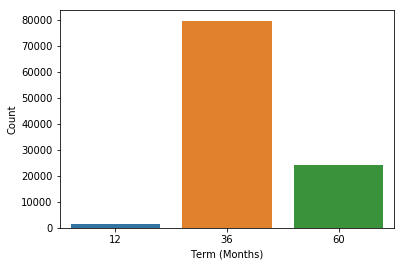

In [171]:
sb.countplot(data = df, x = 'Term')
plt.xlabel('Term (Months)')
plt.ylabel('Count');

36 months (3 years) loans dominate as the primary loan type. Significantly less, but 60 months (5 years) loan term comes in 2nd and lastly 12 months (1 year). We should definitely look into if there is relationship between loan terms and loan amounts in the next section.

**Let us take a look at the distribution of Loan amounts (LoanOriginalAmount) via histogram**

Text(0.5,0,'Loan Amount ($)')

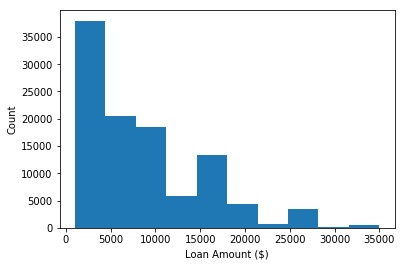

In [172]:
plt.hist(data = df, x = 'LoanOriginalAmount');
plt.ylabel('Count')
plt.xlabel('Loan Amount ($)')

The distribution of loan amount is right-skewed, with a majority of borrowers borrowing under $10,000. Why are smaller loans so prevalent? We should look into whether these people have a job and a home.

**Let's take a look at the count of homeowners and employment status of borrowers via bar chart.**

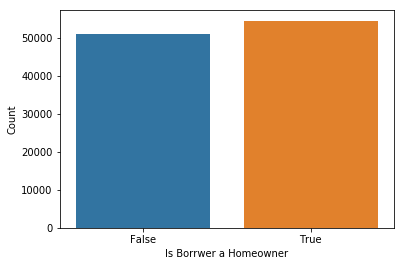

In [173]:
sb.countplot(data = df, x = 'IsBorrowerHomeowner');
plt.ylabel('Count')
plt.xlabel('Is Borrwer a Homeowner');

There seems to be almost a 50:50 split between homeowner status. This partly explains why there is an abundance of loans under 10k.

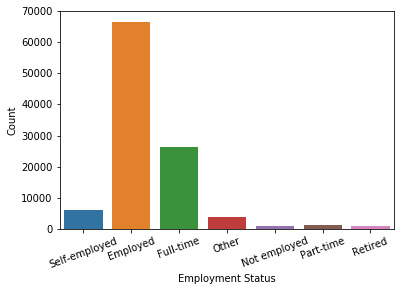

In [174]:
sb.countplot(data = df, x = 'EmploymentStatus')
plt.ylabel('Count')
plt.xlabel('Employment Status')
plt.xticks(rotation = 20);

It looks like a significant portion of the borrowers are employed or have a source of income.

**Let's take a look at the distribution of credit score (upper) via histogram**

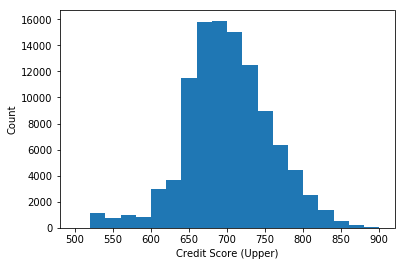

In [175]:
bin_edge = np.arange(500, df['CreditScoreRangeUpper'].max() + 20, 20)
plt.hist(data = df, x = 'CreditScoreRangeUpper', bins = bin_edge)
plt.ylabel('Count')
plt.xlabel('Credit Score (Upper)');

Credit score looks to be normally distributed as expected, but there is an important takeaway here with the fact that it seems harder to climb in credit score after reaching around ~700 as compared to reaching 700. 

**How much interest are these borrowers racking up on their loans? Let's take a look**

In [176]:
df.BorrowerRate.describe()

count    105442.000000
mean          0.193182
std           0.075315
min           0.000000
25%           0.133500
50%           0.184000
75%           0.251100
max           0.360000
Name: BorrowerRate, dtype: float64

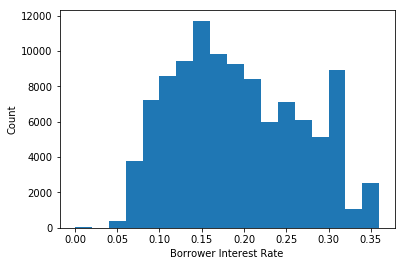

In [177]:
bin_edge = np.arange(0, df['BorrowerRate'].max() + 0.02, 0.02)
plt.hist(data = df, x = 'BorrowerRate', bins = bin_edge)
plt.ylabel('Count')
plt.xlabel('Borrower Interest Rate');

Seems normally distributed centered around 15%, but there's a big spike at 30%. 15% and 30% may be the most common interest rate out there for loans.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I had expected loan amounts to be normally distributed, but it was actually right-skewed, which was a surprise. Credit score on the other hand was normally distributed after bin size transformation. When graphed without any transformations, it resembled a normal distribution with a big empty middle portion, which looked awkward. As previously mentioned, I changed the bin sizes to 20 and was able to produce a normal distribution as expected.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, loan terms were actually only of 3 kind, but stored as integer. Without knowing this I tried making a histogram and it looked very awkward. Having found that there were only 3 kinds of loan terms in the data set, I converted the loan term int objects to string and performed a bar chart instead.

## Bivariate Exploration

**Let's take a look at the relationship between Borrower's Interest Rate and their loan amount. My initial assumption is that the lower the loan amount, the higher the interest, so that the lender can guarantee themselves some profit from smaller loans:**

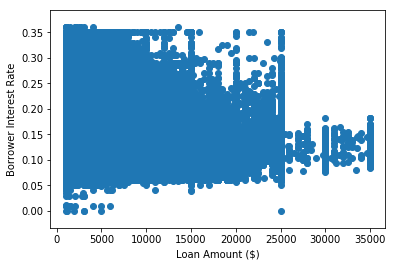

In [192]:
plt.scatter(data = df, x = 'LoanOriginalAmount', y = 'BorrowerRate')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Borrower Interest Rate');

In [179]:
df.LoanOriginalAmount.max()

35000

In [180]:
df.query('LoanOriginalAmount == 35000').BorrowerRate.max()

0.1819

We can clearly see the negative correlation Loan Amount has with the interest rate. While smaller loans ( < 10000) are capping out at 35% interest rate, borrowing 35k is only capping at around 15%. In betweemn you can see this downward trend very clearly. In fact, the highest amount of interest for someone borrowing 35k is 18.19%.

**Now let's take a look at the relationship between Loan Amount and Loan Terms. The longer the terms, the lower the interest should be to compensate for longer periods of interest being applied to the debt:**

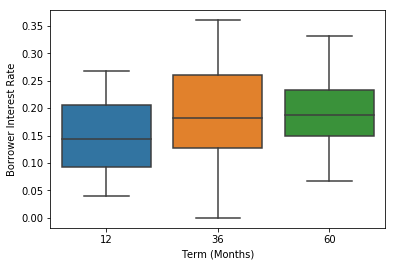

In [181]:
sb.boxplot(data = df, x = 'Term', y = 'BorrowerRate')
plt.ylabel('Borrower Interest Rate')
plt.xlabel('Term (Months)');

Much to my surprise, the loan term and interest rate have a slight positive correltion. This may have been caused by the fact that longer loan terms are usually issued for bigger loans and hence interest rate staying relatively similar to a smaller loan with shorter terms. To verify this we may have to conduct a multivarite visualization including loan amount.

**What kind of borrowers then sign up for loans that are longer to pay off? How does homeowning status affect the loan terms they sign up with? Both of these variables are categorical, so we'll perform a clustered bar chart for this:**

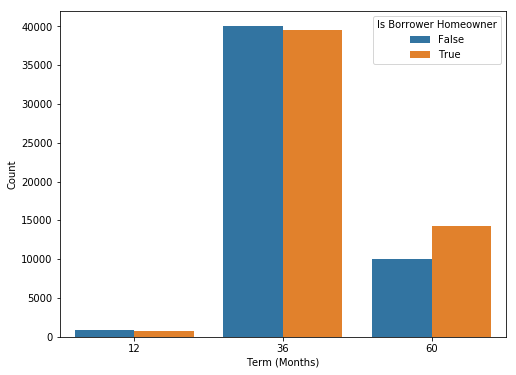

In [182]:
plt.figure(figsize = [8,6])
ax = sb.countplot(data = df, x = 'Term', hue = 'IsBorrowerHomeowner')
ax.legend(title = 'Is Borrower Homeowner')
plt.ylabel('Count')
plt.xlabel('Term (Months)');

A very interesting insight is found. We see that for both 12 and 37 month term loans, there's an approximate 50:50 split on borrowers being a homeowner or not. However, when we go to loans that are borrowed for 60 terms, we see that there are way more homeowners than those who do not own any homes. I would like to believe that this is because owning a home comes with the benefit of having less debt, hence the ability to afford long loan terms.

**Digressing from the main interest of the analysis I would like to check the validity of HomeOwner variable by plotting it with employment status:**

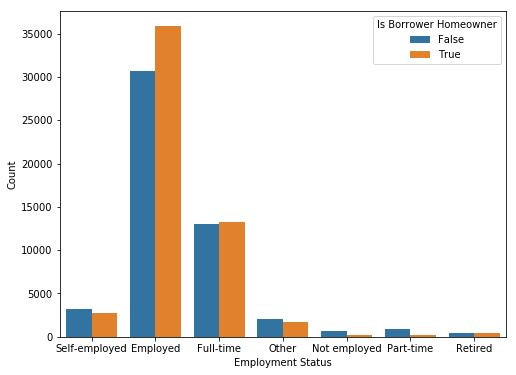

In [183]:
plt.figure(figsize = [8,6])
ax = sb.countplot(data = df, x = 'EmploymentStatus', hue = 'IsBorrowerHomeowner')
ax.legend(title = 'Is Borrower Homeowner')
plt.ylabel('Count')
plt.xlabel('Employment Status');

Indeed we see that among those who are employed, more people are homeowners than those who are not.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I conducted 3 Bivariate plots, 2 of which with its own expectations of the outcome. I was correct with loan amount and interest rate, but was proven otherwise loan terms and loan interest. The higher the loan amount, the lower the interest rate, but the interest rate did not vary as much as expected based on loan terms.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes. I plotted Home owner status vs employment status to see if each of them were related and to see if any one of them was a good predictor of wealth and indeed I was able to see that among those who were employed, there were more homeowners than those who were not.

## Multivariate Exploration


**Let us now take a look at the relationship between Loan Terms, Loan Amount, and Interest Rate to see how each of these very important information of a loan affect each other**

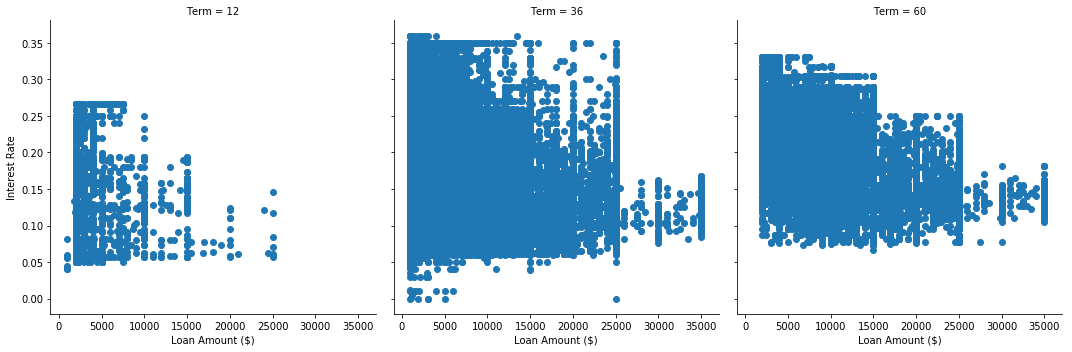

In [191]:
g = sb.FacetGrid(data = df, col = 'Term', height = 5, col_wrap = 3)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate')
g.set_axis_labels("Loan Amount ($)", "Interest Rate");

In [185]:
df.query('Term == "12"').LoanOriginalAmount.max()

25000

A few very interesting insights can be gained here. First, 12 month term loans have the lowest interest rate and is by far the least occuring loan term. The highest recorded 12 month term loan was also 25k. Secondly, we see that based on the frequency of dots on the general graph, 36 term loans are the most frequent - and it only makes sense that the loaners try to make their most money from this group of borrowers by charging them the highest interest across all loans. Across all loan amounts up to 30k, we see that 36 month term loans have the highest interest rates. In the last graph, we see that 60 month loans are the second-most popular loan type. They generally offer a lower interest across the board, except bigger loans, starting at 30k and up, with marginal increase in interest rates.

**I would now like to take a look at how Credit Score affects the type of loans you get (Interest Rate and Terms)**

Currently, the credit score values resemble a categorical value due to the upper limit nature, while true credit score is that of a numerical variable. We will combat this by manually adding jitter and creating a new column called, "jitter_credit".

In [186]:
df['jitter_credit'] = df['CreditScoreRangeUpper']

A:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [187]:
for i in range(len(df)):
    df['jitter_credit'].values[i] = df['jitter_credit'].values[i] + np.random.randint(-10,10)

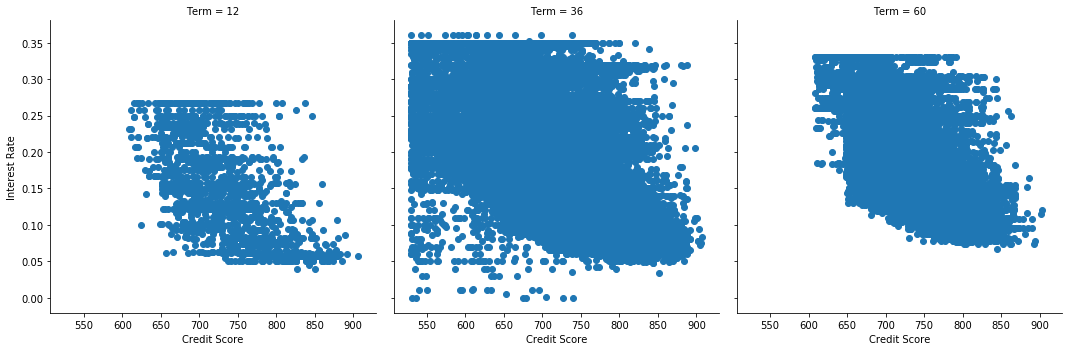

In [190]:
g = sb.FacetGrid(data = df, col = 'Term', height = 5, col_wrap = 3)
g = g.map(plt.scatter, 'jitter_credit', 'BorrowerRate')
g.set_axis_labels("Credit Score", "Interest Rate");

Two interesting insights from this plot: First, we see that there is a moderate negative correlation between Credit Score and Interest Rate. The higher your credit score, the more you are rewarded with less interest. Makes sense. Secondly, we see that longer term loans (60 months) with generally higher committment and shorter term loans with generally higher payments (12 months) are only given to borrowers with higher credit score (> 600). Meanwhile, we see that borrowers with lower than 600 credit score are often finding themselves with 36 month term loans.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In trying to understand the nature of loans and how each big category of a loan affect each other, it was very informative when I put Credit Score vs Interest Rate vs Loan Terms. I had done Credit Score vs Interest Rate in the previous section, but when I was able to include Loan Terms as the 3rd variable in the plot, I gained much more insight about the kind of borrowers who get these terms and interest rates.

### Were there any interesting or surprising interactions between features?

> I had expected longer term loans (60m) to not have or have very few small loan amounts, which was not true and it was interesting to know that the interest rate for small loans stayed relatively same throughout the different loan terms. I found this interesting.

In [189]:
#Save dataframe for use in slides
df.to_csv("prosperLoanData_edit.csv", index = False)